1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в еонкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.



 - а. Да. т.к. мы расматриваем изменение цены на протяжение времени 
 - б. нет, 
 - в. нет, так к
 - г. Если эти данные расматриваются во временном интервале
 - д. Скорее всего да , так как мы рассматриваем положение координат в разное время 
 - е. Нет, так как нет привязки к времени 

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from pylab import rcParams



from sklearn.metrics import mean_squared_error

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.



In [2]:
df = pd.read_csv('5414de2a82bc1d8c1a9aac84cca84e47.csv', index_col=[0], parse_dates=[0])

In [3]:
df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [6]:
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [7]:
#df['DUQ_MW'] = df['DUQ_MW'].astype('int')

In [8]:
df.sort_values('Datetime', ascending=True)

,DUQ_MW
Datetime,
2005-01-01 01:00:00,1364.0
2005-01-01 02:00:00,1273.0
2005-01-01 03:00:00,1218.0
2005-01-01 04:00:00,1170.0
2005-01-01 05:00:00,1166.0
...,...
2018-08-02 20:00:00,1966.0
2018-08-02 21:00:00,1944.0
2018-08-02 22:00:00,1901.0


In [9]:
df['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

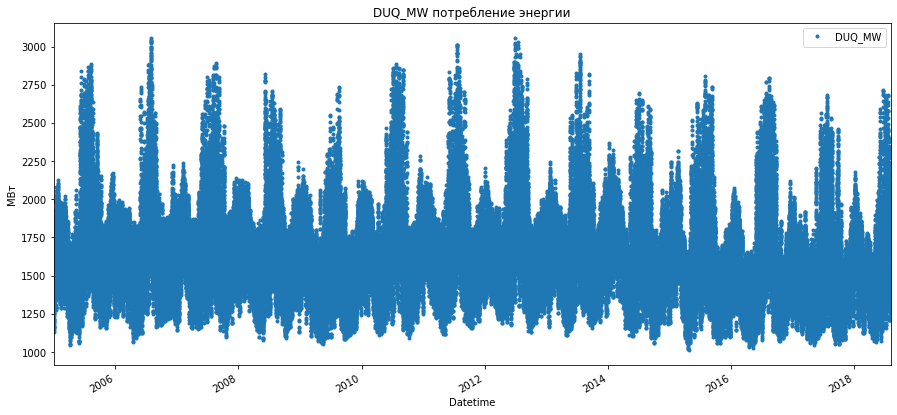

In [10]:
df.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

Результат анализа типов показывает, что интервал изменения индексов начинается от 2005-12-31 01:00:00 to 2018-01-02 00:00:00. Шаг измерений по времени составляет 1 час. Общий объем данных составляет 119068 значений, а тип измеряемой информации при записи был определен как float64. Визуальный анализ показывает, что предъявленные данные имеют циклы
 

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.



In [16]:
df2 = pd.read_excel('yt.xlsx',index_col=[0], parse_dates=[0])

In [17]:
df2.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [19]:
df2.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


Text(0.5, 0, 't')

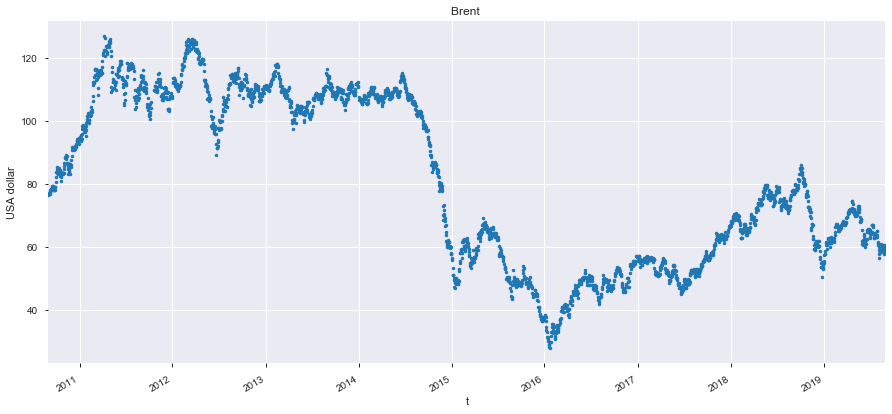

In [20]:
_ = df2['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [33]:
w = df2.resample("W").mean()
m = df2.resample("M").mean()
y = df2.resample("Y").mean()

Text(0, 0.5, 'МВт')

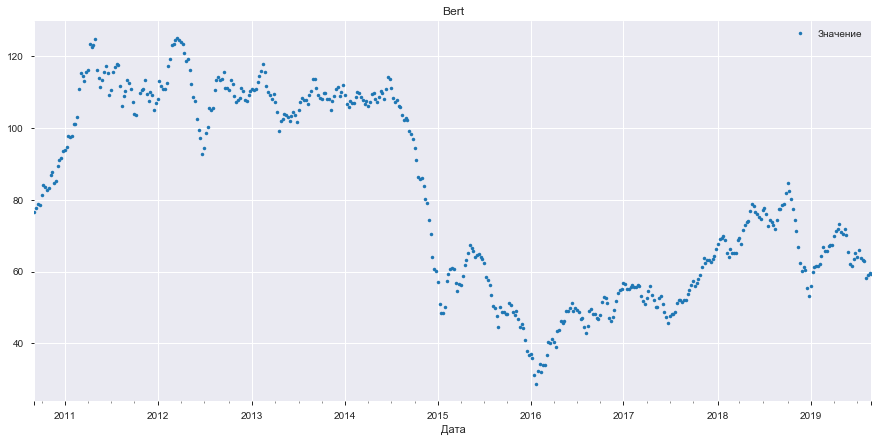

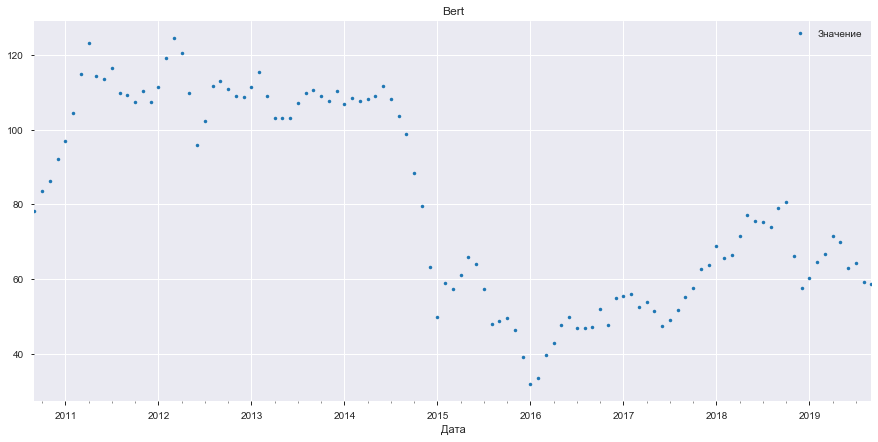

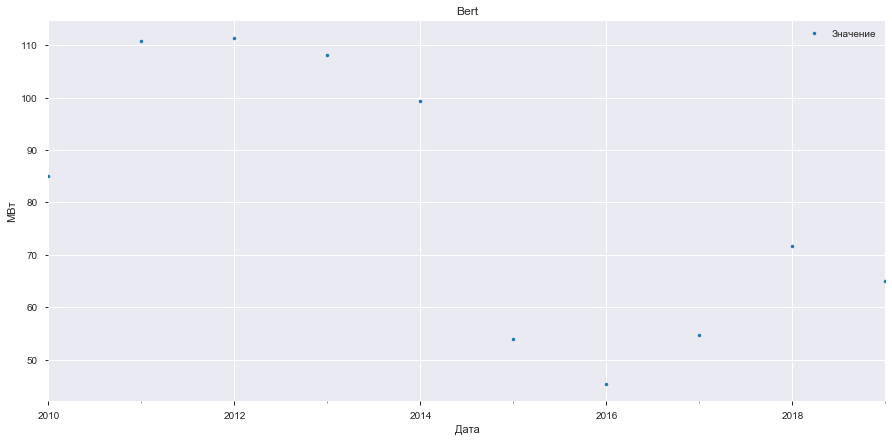

In [34]:
w.plot( style = '.', figsize = ( 15, 7 ), title = 'Bert' )
m.plot( style = '.', figsize = ( 15, 7 ), title = 'Bert' )
y.plot( style = '.', figsize = ( 15, 7 ), title = 'Bert' )
plt.ylabel ( 'МВт' )

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [35]:
w = df2.resample("W").mean()
m = df2.resample("M").mean()
y = df2.resample("Y").mean()
w_st = df2.resample("W").std()
m_st = df2.resample("M").std()
y_st = df2.resample("Y").std()

In [56]:
fig = plt.gcf()

<Figure size 576x396 with 0 Axes>

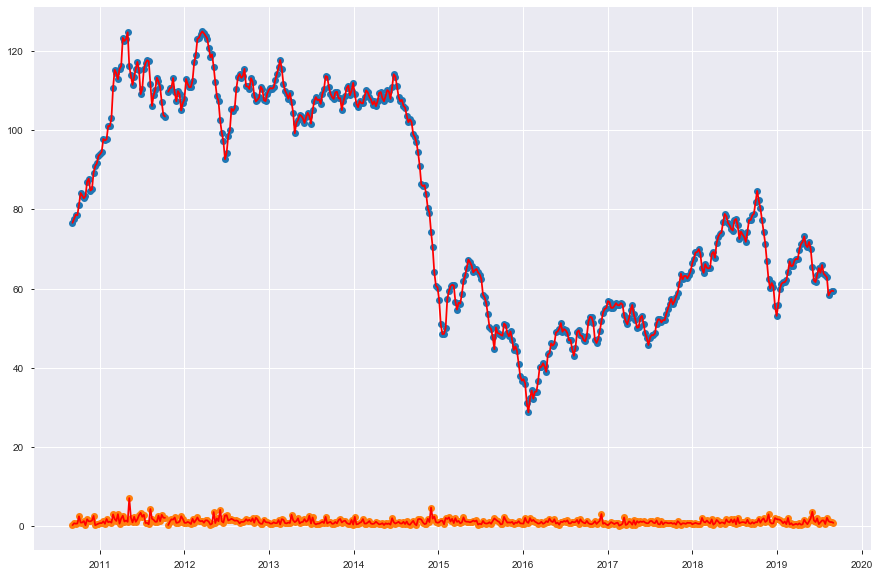

In [59]:
rcParams['figure.figsize'] = 15, 10
plt.plot(w,'o')
plt.plot(w,color= 'red')
plt.plot(w_st,'o')
plt.plot(w_st,color = 'red')

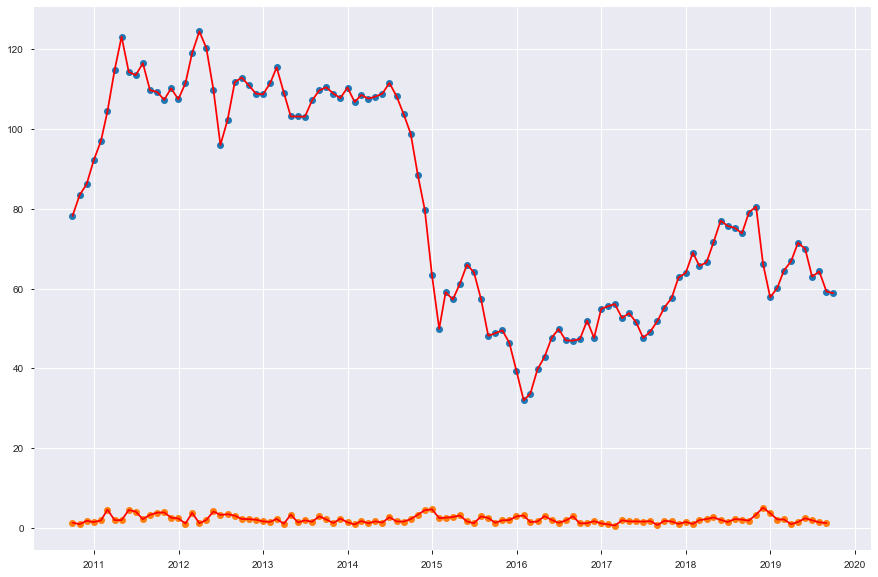

In [61]:
rcParams['figure.figsize'] = 15, 10
plt.plot(m,'o')
plt.plot(m,color= 'red')
plt.plot(m_st,'o')
plt.plot(m_st,color = 'red')

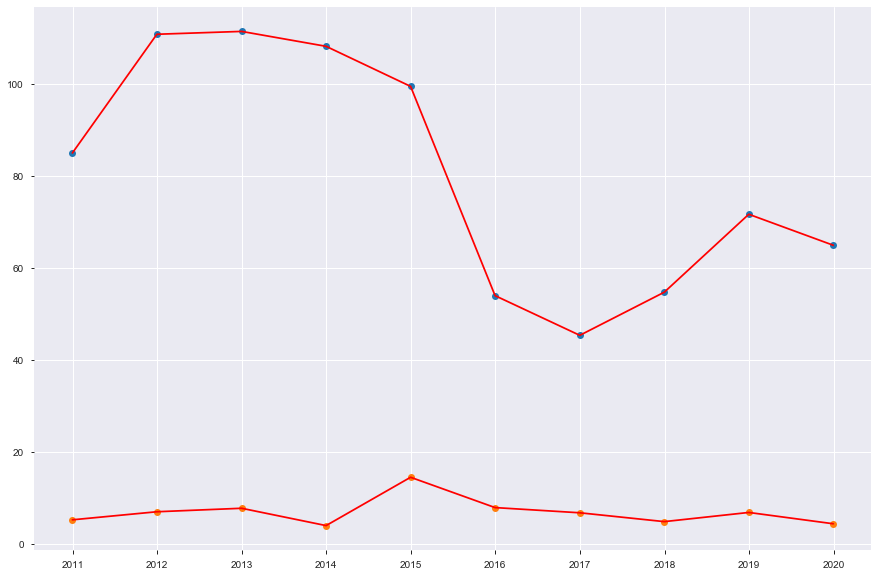

In [62]:
rcParams['figure.figsize'] = 15, 10
plt.plot(y,'o')
plt.plot(y,color= 'red')
plt.plot(y_st,'o')
plt.plot(y_st,color = 'red')

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.